<a href="https://colab.research.google.com/github/gsgh3016/cultural-public-data-project/blob/main/%EB%AC%B8%ED%99%94%EA%B3%B5%EB%AA%A8%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

구글 코랩에서 동작
# 구글 드라이브 연동 및 csv 파일 읽기

## 1. 구글 드라이브에 cultureCompetition 폴더 생성
## 2. 필요한 파일 다운로드하기
* <a href="https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=2de22ef0-4102-11eb-af9a-4b03f0a582d6">다문화 상담 현황 csv 파일</a> counselData.csv로 이름 바꾸기 (메타데이터 파일 이름 counselData_column_definition.csv로 이름 바꾸기)
* <a href="https://www.data.go.kr/data/3077033/fileData.do">시도별 센터 현황</a> centerData.csv로 이름 바꾸기

In [ ]:
# 실행 후 런타임 해제 및 다시 실행 필요 -> 한글 인코딩 위함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

위 셀 실행 후 런타임 끊었다가 다시 실행해야 함

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

center_data = pd.read_csv('/content/drive/MyDrive/cultureCompetition/centerData.csv', encoding='cp949')
counsel_data = pd.read_csv('/content/drive/MyDrive/cultureCompetition/counselData.csv')
people_data = pd.read_csv('/content/drive/MyDrive/cultureCompetition/peoplenumberData.csv', encoding='cp949')
counsel_data_column_definition=pd.read_csv('/content/drive/MyDrive/cultureCompetition/counselData_column_definition.csv')

# 전처리

## `counsel_data` 전처리
---
전처리 결과 `result_counsel_data`
* index(str): 지역
* column(int): 년도 별 상담 건 수(건)

### column 이름 재정의

In [ ]:
new_column_names = counsel_data_column_definition["컬럼한글명"]
counsel_data = counsel_data.set_axis(new_column_names, axis=1)

In [ ]:
local_names = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종',
             '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
years = list(range(2015, 2021))

### 필요한 column 추출

In [ ]:
extract_counsel_columns_name = [
    '통계연월', '여자상담수', '남자상담수', '서울상담인원수', '부산상담인원수', '대구상담인원수',
    '인천상담인원수', '광주상담인원수', '대전상담인원수', '울산상담인원수', '세종상담인원수', '경기상담인원수',
    '강원상담인원수', '충북상담인원수', '충남상담인원수', '전북상담인원수', '전남상담인원수', '경북상담인원수',
    '경남상담인원수', '제주상담인원수', '본국상담인원수', '기타상담인원수'
]

In [ ]:
filtered_counsel_data = counsel_data
for column_name in counsel_data.columns:
  if column_name not in extract_counsel_columns_name:
    filtered_counsel_data = filtered_counsel_data.drop(column_name, axis=1)

### 결측치 포함 row 제거

In [ ]:
filtered_counsel_data.isnull().sum()

컬럼한글명
통계연월       0
여자상담수      0
남자상담수      0
서울상담인원수    7
부산상담인원수    7
대구상담인원수    7
인천상담인원수    7
광주상담인원수    7
대전상담인원수    7
울산상담인원수    7
세종상담인원수    7
경기상담인원수    7
강원상담인원수    7
충북상담인원수    7
충남상담인원수    7
전북상담인원수    7
전남상담인원수    7
경북상담인원수    7
경남상담인원수    7
제주상담인원수    7
본국상담인원수    7
기타상담인원수    7
dtype: int64

In [ ]:
null_rows = filtered_counsel_data[filtered_counsel_data.isna().any(axis=1)]   # 결측치 포함 행 index 저장
print(len(null_rows))
filtered_counsel_data = filtered_counsel_data.drop(null_rows.index)

7


### 년도별 평균 데이터로 가공

In [ ]:
filtered_counsel_data = filtered_counsel_data.groupby('통계연월').sum()

In [ ]:
year_index = [year // 100 for year in filtered_counsel_data.index]
# filtered_counsel_data의 인덱스는 201504와 같은 6자리 int로 저장됨
filtered_counsel_data['년도'] = year_index

In [ ]:
mean_counsel_data = filtered_counsel_data.groupby('년도').mean(numeric_only=True)
mean_counsel_data = mean_counsel_data.loc[:, '서울상담인원수':]

In [ ]:
filtered_counsel_data_column_name = mean_counsel_data.columns
column_name_tmp = []
for column_name in filtered_counsel_data_column_name:
  column_name_tmp.append(column_name[:2])   # 지역 이름 간소화(local_names와 똑같이 정의)

filtered_mean_counsel_data = mean_counsel_data.set_axis(column_name_tmp, axis=1)
result_counsel_data = filtered_mean_counsel_data         # 변수명 통일 (result_분석내용_data)

## `people_data` 전처리
---
전처리 결과: `result_people_data`
* index(str): 지역
* column(float): 년도 별 다문화가구 가구원 수(명)

### 필요한 column 추출

In [ ]:
people_data_column_level_one = []
for year in people_data.columns[1:]:      # column 이름 추출 (int 원소 list)
  if year.find('.'):
    people_data_column_level_one.append(int(year[:4]))
  else:
    people_data_column_level_one.append(int(year))
people_data_column_level_two = people_data.loc[0, '2015':]
people_data_index_name = local_names      # index 이름

In [ ]:
target_index = 0
for i in range(len(people_data)):         # 전국, 읍, 면, 동 행 drop 위한 for 문
  if people_data.loc[i, '행정구역별(시군구)'] == '서울특별시':
    target_index = i
drop_rows = [i for i in range(target_index)]
dropped_people_data = people_data.drop('행정구역별(시군구)', axis=1)
dropped_people_data = dropped_people_data.drop(drop_rows, axis=0)

dropped_people_data.index = people_data_index_name      # index 새로 설정

In [ ]:
# multi index column 설정
multi_index = pd.MultiIndex.from_arrays(
    arrays=[people_data_column_level_one, people_data_column_level_two],
    names=['년도', '세부항목']      # level 1: 년도, level 2: 세부항목
)

dropped_people_data.columns = multi_index
tmp_people_data = dropped_people_data

### `result_counsel_data`, `result_people_data` 행 열 일치

In [ ]:
result_counsel_data = result_counsel_data[local_names].T

In [ ]:
target_people_column_name = '다문화가구_가구원_계'
result_people_data = tmp_people_data

for column_name in result_people_data.columns:      # column 방향 접근
  if column_name[1] != target_people_column_name:
    # column_name이 tuple 형(tuple의 index가 multi indexing column level 의미함)
    result_people_data = result_people_data.drop(column_name, axis=1)

In [ ]:
result_people_data.columns = years    # column 재정의

## `center_data` 전처리
---
전처리 결과: `center_count_df`
* index(str): 지역
* column(float): 센터 수(개)

In [ ]:
center_count=[]

for local_name in local_names:  # 지역 별 센터 수 counting
  count = center_data.iloc[:, 1].value_counts()[local_name]
  center_count.append(count)

In [ ]:
center_count_df = pd.DataFrame({'센터수': center_count}, index=local_names)

In [ ]:
# 비율 연산을 위한 형변환 int -> float
center_count_df['센터수'] = center_count_df['센터수'].astype(float)
result_people_data = result_people_data.astype(float)

# 연산

## 상담 수 / 다문화 가구원 (상담 비율)
---
코드 실행 결과: `ratio_df`
* index(str): 지역
* column(float): 상담 비율 = 상담 수 / 다문화가구 가구원 수 * 100 (%)

In [ ]:
counsel_people_ratio_data = []
ratio_df = result_counsel_data.div(result_people_data).mul(100)

## 상담 수 / 센터 수
---
코드 실행 결과: `center_counsel_ratio_df`
* index(str): 지역
* columns(float): 센터 당 상담 건 수 (건/센터)

In [ ]:
center_counsel_ratio_df = pd.DataFrame([])
for year in years:
  center_counsel_ratio_df[year] = result_counsel_data[year].div(center_count_df['센터수'], axis=0)

## spearman 상관관계 분석
---
코드 실행 결과
* `kendall_tau_list`, `spearman_corr_list`: 전체 지역의 상관관계 값 list
* `sliced_kendall_tau_list, sliced_spearman_corr_list`: 상하위 3개 지역의 상관관계 값 list

In [ ]:
from scipy.stats import kendalltau, spearmanr

def get_ranked_indices(df):
  """
  오름차순으로 정렬된 index(지역) list를 계산하는 함수
  Args:
    df (pd.DataFrame): 해당 dataframe
  Returns:
    Tuple[List[List[int]], List[List[int]]]:
      0: 정렬된 전체 지역
      1: 정렬된 상하위 3개 지역
      * 년도별 오름차순 정렬 list
  """
  ranked_indices = [df.nlargest(len(df.index), year).index.tolist() for year in years]
  sliced_ranked_indices = [idx[:3] + idx[-3:] for idx in ranked_indices]
  return ranked_indices, sliced_ranked_indices

In [ ]:
def compute_correlations(indices1, indices2):
  """
  kendall tau, spearman 상관관계 계산하는 함수
  Args:
    indices1(list[int]): index 저장 list
    indices2(list[int]): index 저장 list
  Returns:
    tau_list(list[int]): 계산된 tau 값 list(years와 같은 index)
    corr_list(list[int]): 계산된 corr 값 list(years와 같은 index)
  """
  tau_list = []
  corr_list = []
  for i in range(len(years)):
    mapping = {index: i for i, index in enumerate(sorted(set(indices1[i] + indices2[i])))}
    list1_numbers = [mapping[index] for index in indices1[i]]
    list2_numbers = [mapping[index] for index in indices2[i]]
    tau, _ = kendalltau(list1_numbers, list2_numbers)
    corr, _ = spearmanr(list1_numbers, list2_numbers)
    tau_list.append(tau)
    corr_list.append(corr)
  return tau_list, corr_list

In [ ]:
ratio_2d_order, sliced_ratio_2d_order = get_ranked_indices(ratio_df)
center_counsel_ratio_2d_order, sliced_center_counsel_ratio_2d_order = get_ranked_indices(center_counsel_ratio_df)

In [ ]:
kendall_tau_list, spearman_corr_list = compute_correlations(ratio_2d_order, center_counsel_ratio_2d_order)
sliced_kendall_tau_list, sliced_spearman_corr_list = compute_correlations(sliced_ratio_2d_order, sliced_center_counsel_ratio_2d_order)

# 데이터 시각화

## 시각화 함수 선언부
---
* `make_gpd`: `pd.DataFrame` to `gpd.GeoDataFrame`
* `geo_plot`: `gpd.GeoDataFrame` 컬러 맵 지도 시각화
* `year_plot`: `pd.DataFrame` 선 그래프 시각화

In [ ]:
import geopandas as gpd
import os

south_korea = gpd.read_file('/content/drive/MyDrive/cultureCompetition/South_Korea.shx')
south_korea.index = local_names

def make_gpd(target_df: pd.DataFrame) -> gpd.GeoDataFrame:
  """
  pd.DataFrame을 gpd.GeoDataFrame으로 합쳐주는 함수
  Args:
    target_df(pd.DataFrame): 합칠 pd.DataFrame
  Return:
    gpd.GeoDataFrame: 합쳐진 gpd.GeoDataFrame
  """
  tmp = south_korea
  for year in range(2015, 2021):
    tmp[year] = target_df[year]
  return tmp

In [ ]:
def geo_plot(target_year: int,
             target_gdf: gpd.GeoDataFrame,
             label: str,
             title: str,
             isRatio=True
             ) -> None:
  """
  연도 입력하면 한반도 컬러 맵 출력 및 저장
  Args:
    target_year(int): 해당 년도
    target_df(gpd.GeoDataFrame): 출력할 데이터 프레임
    label(str): color map이 나타내는 것
    title(str): 지도 제목
    isRatio(bool): 상담 비율 여부 플래그(센터 당 상담 수의 경우 False로 할 것)
  Return:
    None
  """
  # plot하기 위한 error handling
  target_gdf[target_year] = pd.to_numeric(target_gdf[target_year], errors='coerce')

  target_gdf.plot(
      column=target_year,
      legend=True,
      legend_kwds={'label': label}
  )

  plt.title(str(target_year) + "년 전국" + title + "현황")

  # 파일 저장부
  url = "/content/drive/MyDrive/cultureCompetition/"
  if isRatio:
    url += str(target_year) + "_counsel_ratio.png"
  else:
    url += str(target_year) + "_counsel_center.png"
  if not os.path.isfile(url):
    plt.savefig(url)

In [ ]:
def year_plot(target_name: str,
              target_df: pd.DataFrame,
              title: str,
              xl: str,
              yl: str
              ) -> None:
  """
  해당 지역 이름 입력하면 년도별 데이터 변화 양상 그래프 표시
  Args:
    target_name(str): 해당 지역
    target_df(pd.DataFrame): 출력할 데이터
    title(str): 그래프 이름
    xl(str): x축 설명
    yl(str): y축 설명
  Returns:
    None
  """
  tmp_list = []
  if isinstance(target_df, pd.DataFrame):
    tmp_list = list(target_df.loc[target_name])
  if isinstance(target_df, list):
    tmp_list = target_df
  tmp_list = [round(e, 3) for e in tmp_list]

  if target_name:
    plt.title(target_name + " " + title)
  else:
    plt.title(title)
  plt.bar(years, tmp_list)
  plt.xlabel(xl)
  plt.ylabel(yl)

  # 값 표기
  for i, year in enumerate(years):
    plt.text(year, tmp_list[i], tmp_list[i],
             horizontalalignment='center',
             verticalalignment='bottom')

  # 파일 저장부
  url = "/content/drive/MyDrive/cultureCompetition/"
  if not target_name:
    target_name = ""
  else:
    target_name += "_"
  url += target_name + title + ".png"
  if not os.path.isfile(url):
    plt.savefig(url)

  # 출력
  plt.show()

## 상담 비율 데이터 시각화

In [ ]:
sido = make_gpd(ratio_df)

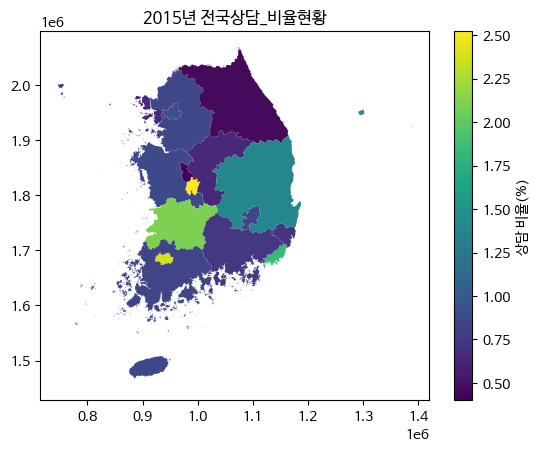

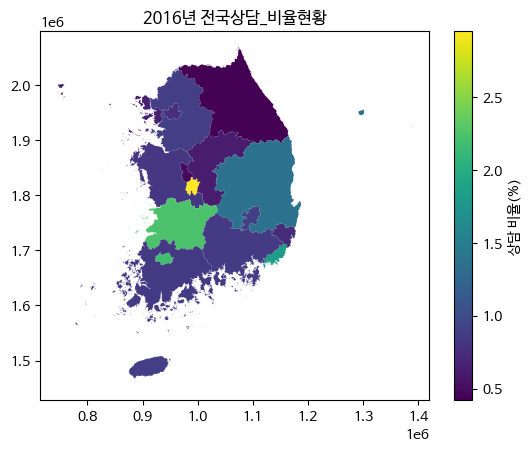

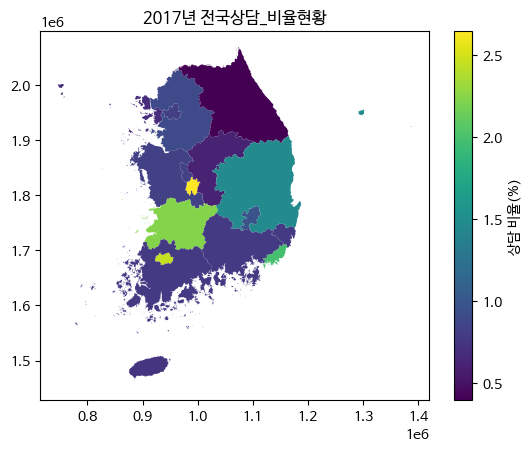

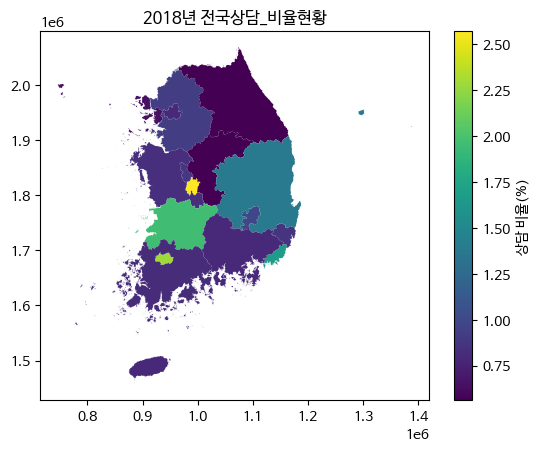

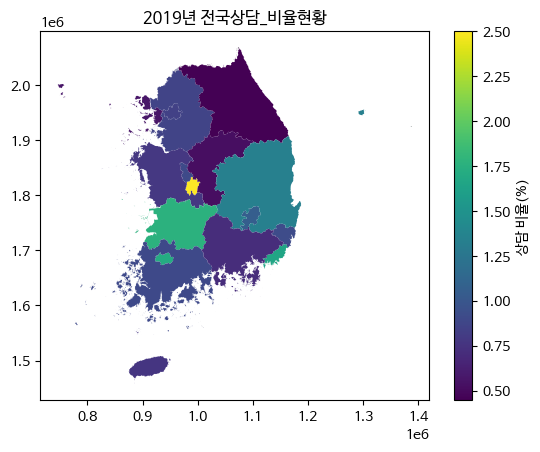

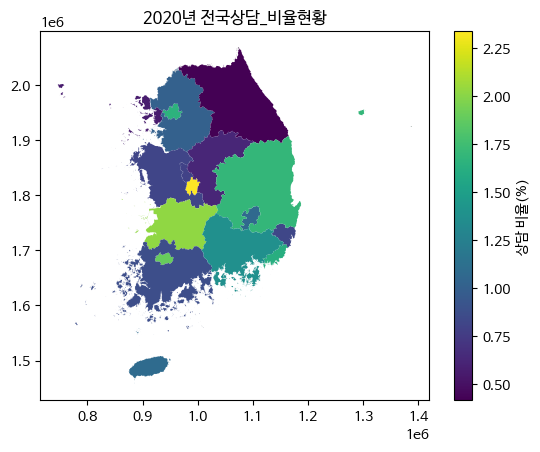

In [ ]:
for year in years:
  geo_plot(year, sido, "상담 비율(%)", "상담_비율")

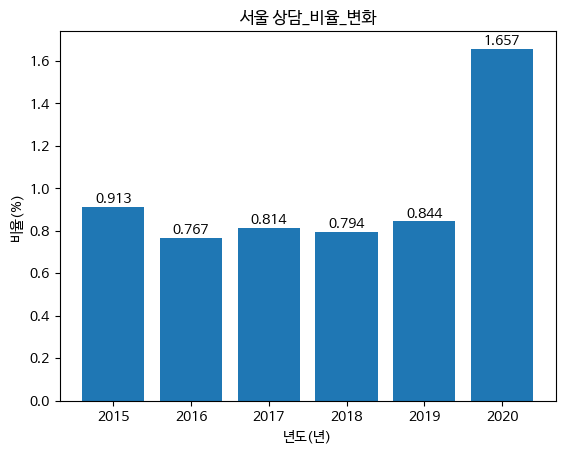

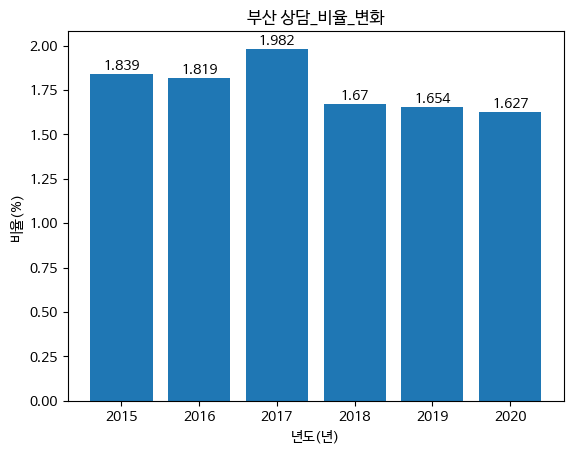

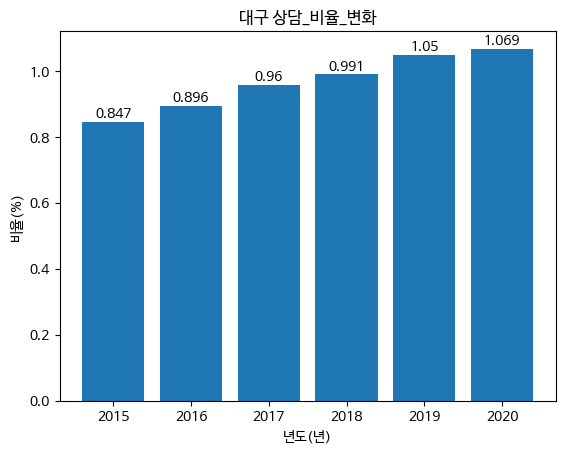

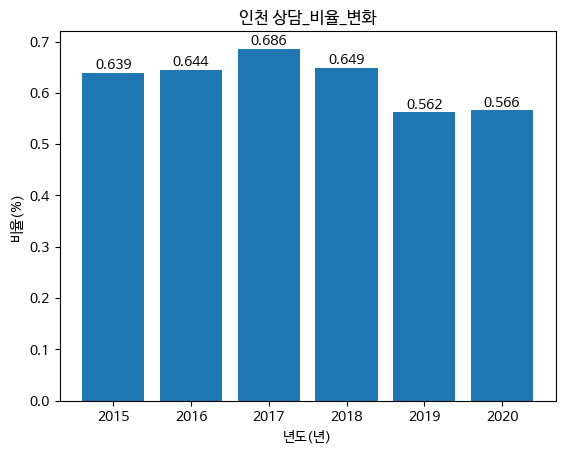

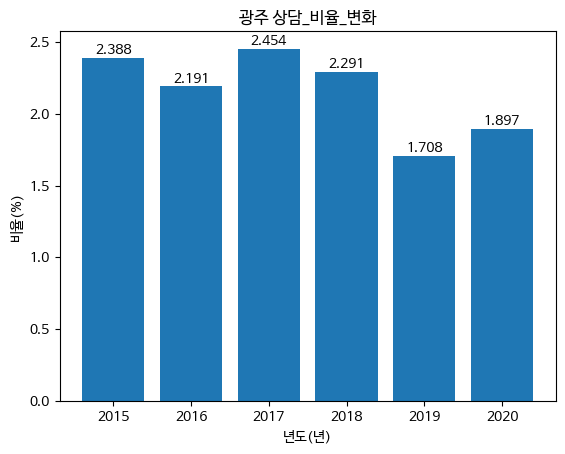

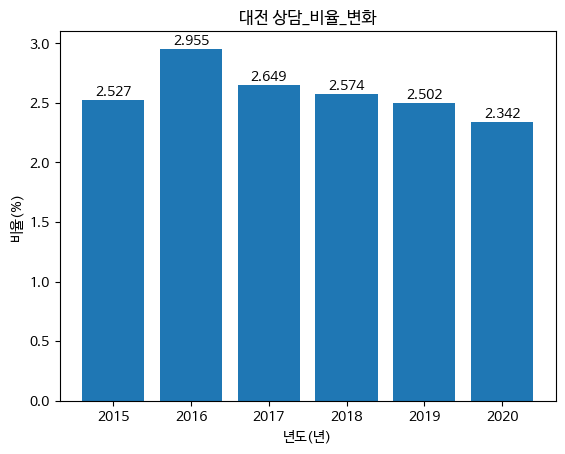

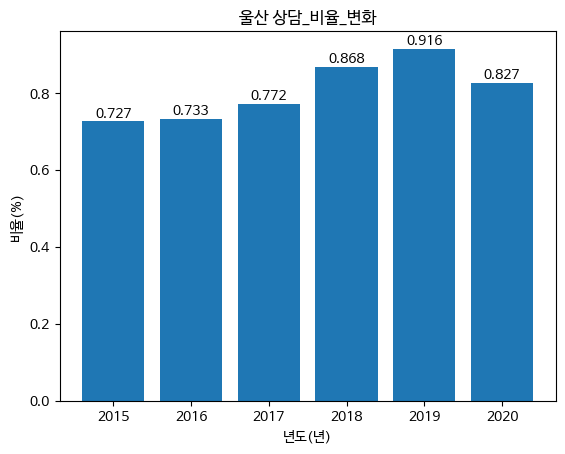

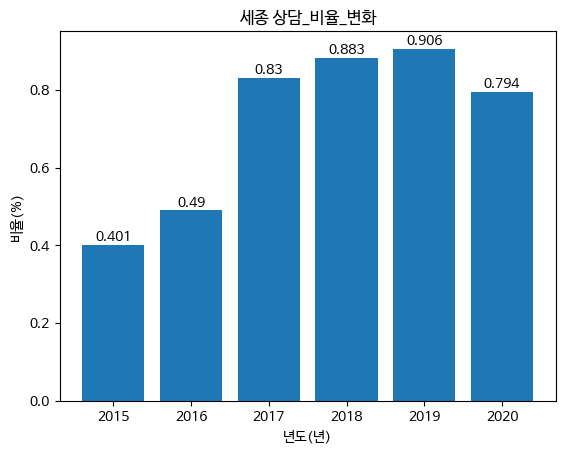

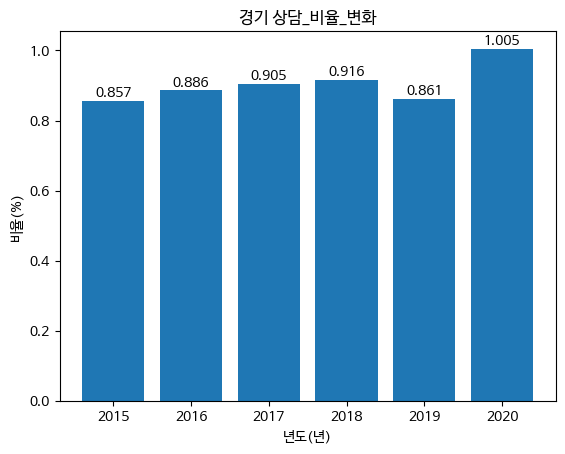

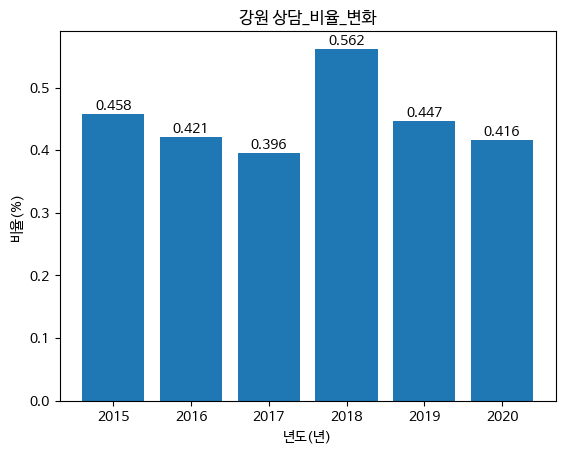

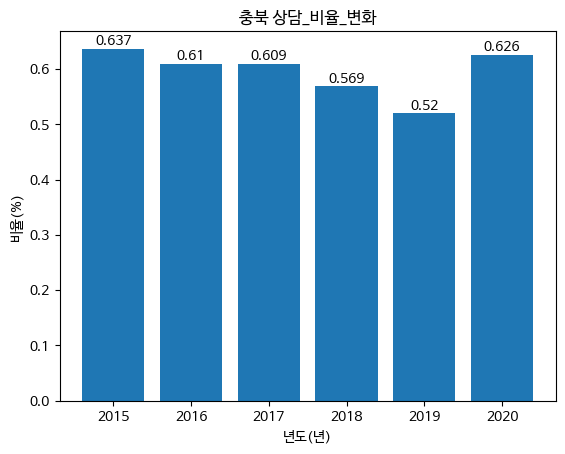

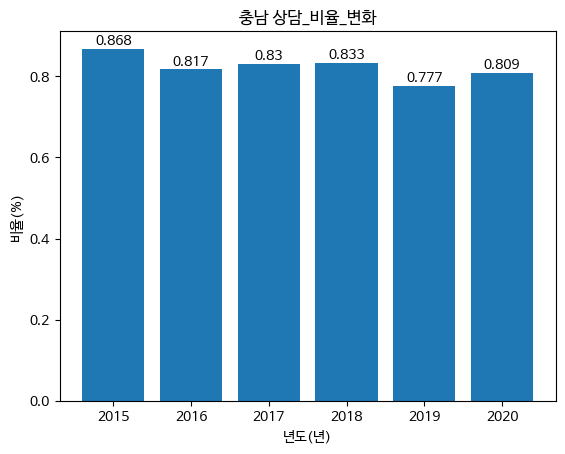

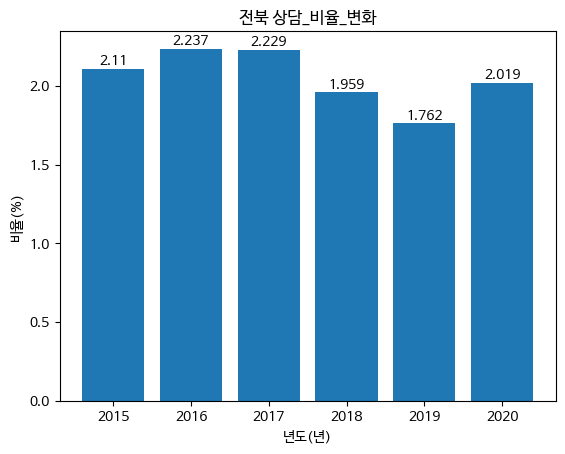

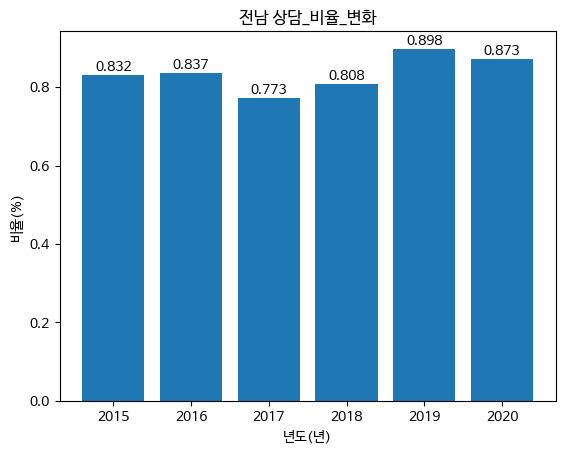

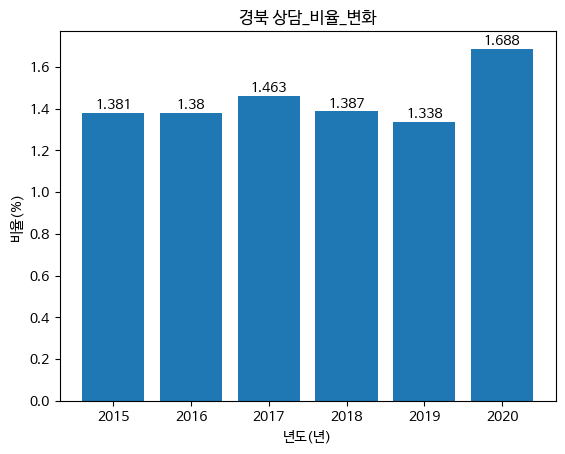

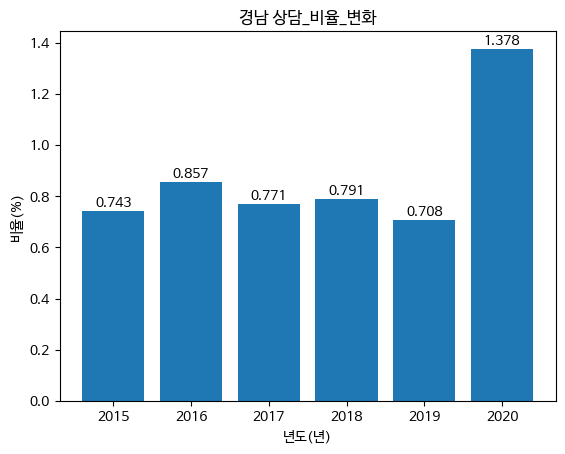

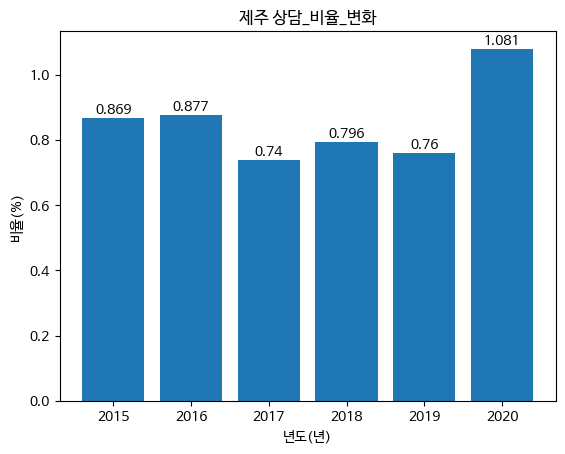

In [ ]:
for local_name in local_names:
  year_plot(local_name, ratio_df, "상담_비율_변화", "년도(년)", "비율(%)")

## 상담 수 / 센터 수 시각화

In [ ]:
center_counsel_sido = make_gpd(center_counsel_ratio_df)

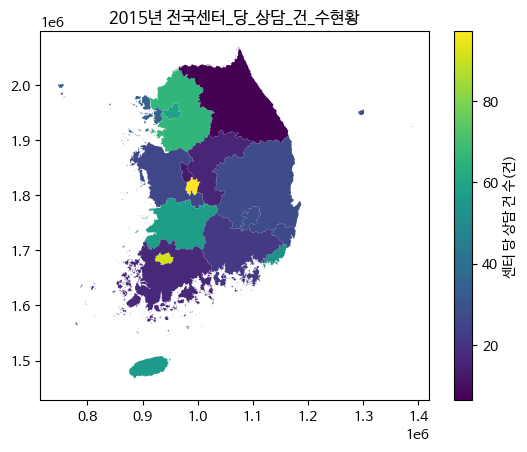

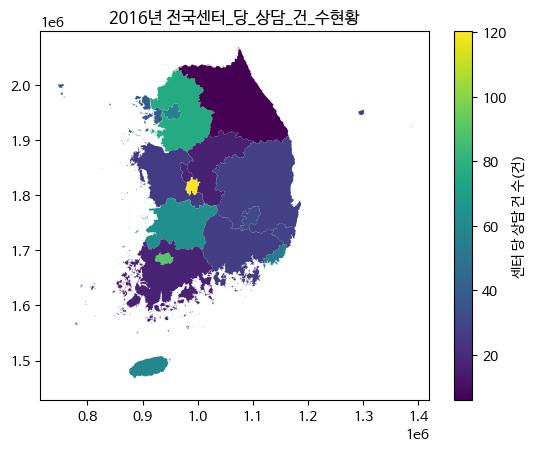

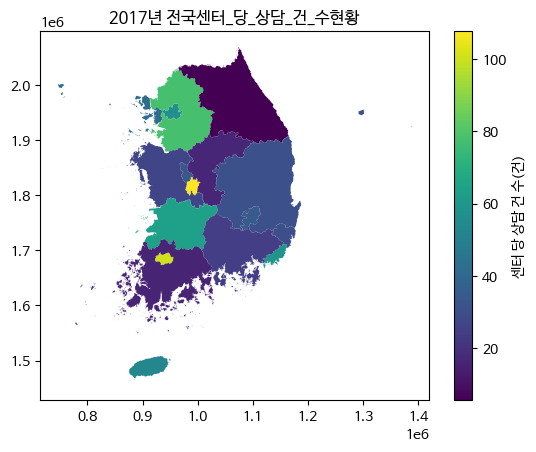

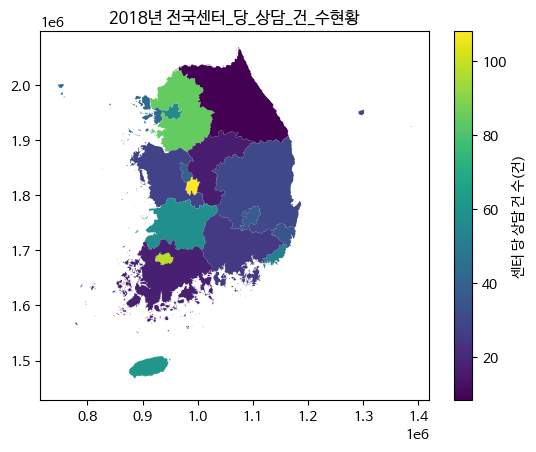

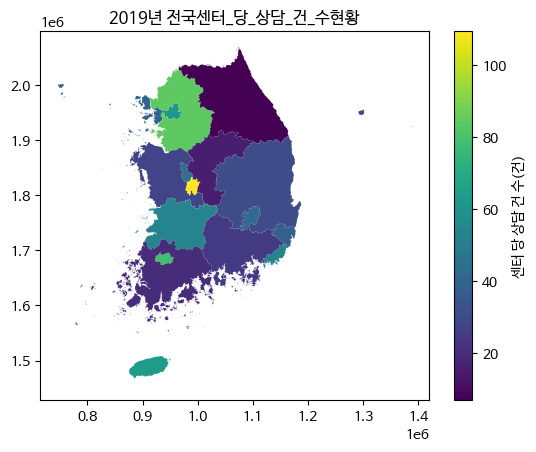

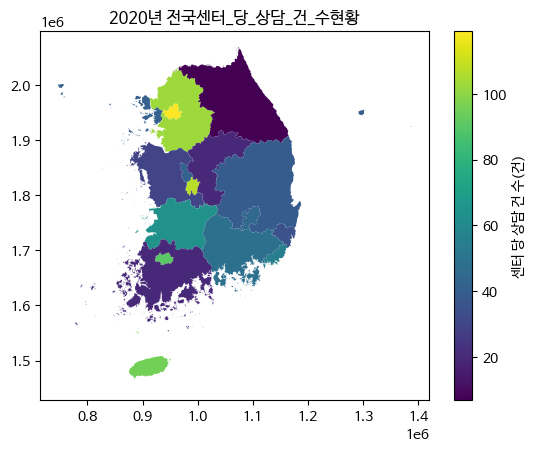

In [ ]:
for year in years:
  geo_plot(year, center_counsel_sido, "센터 당 상담 건 수(건)", "센터_당_상담_건_수", False)

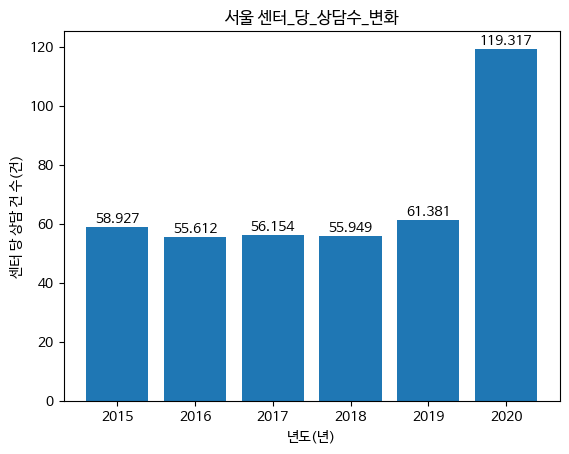

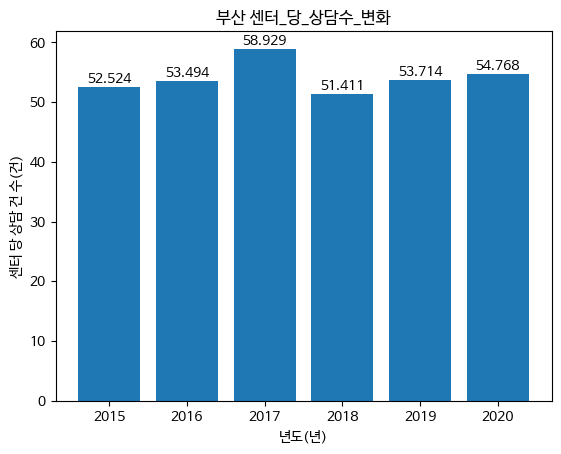

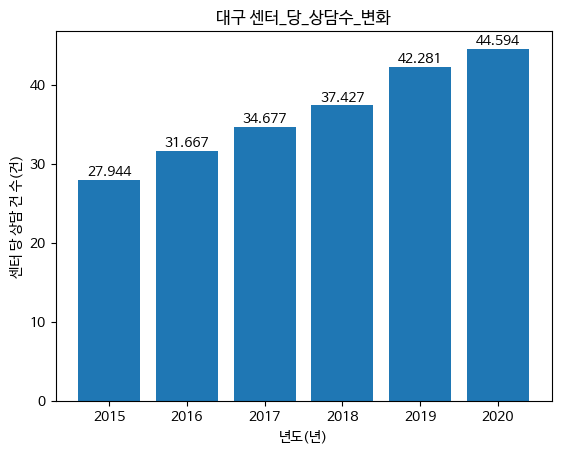

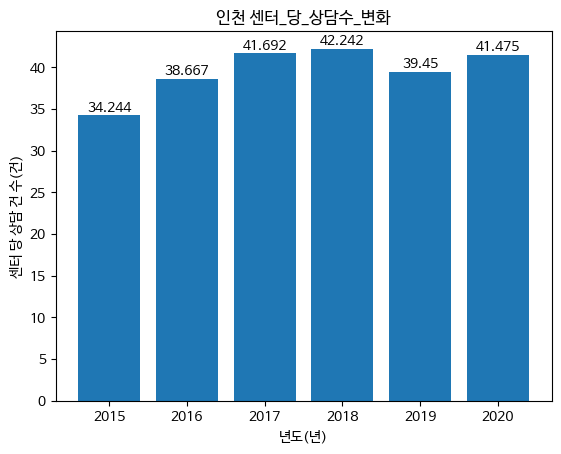

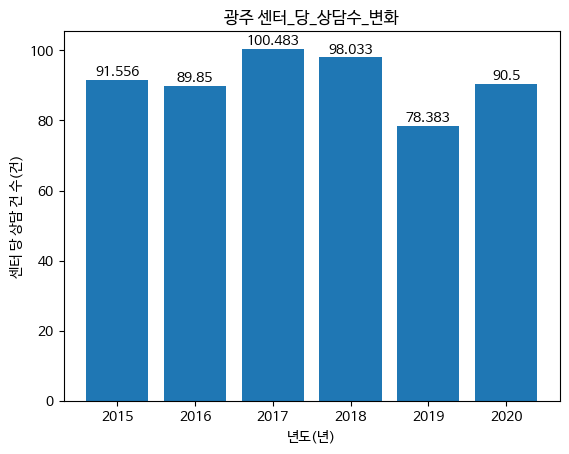

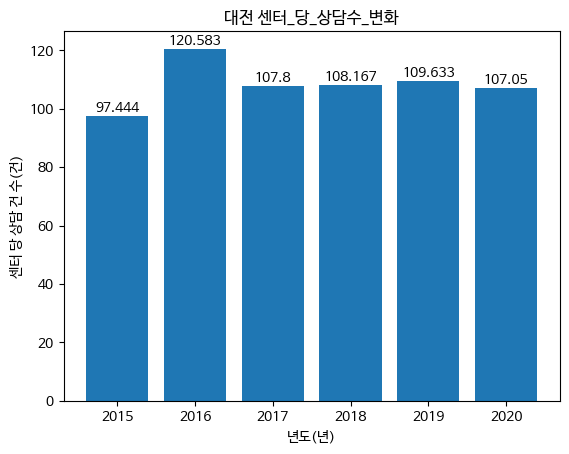

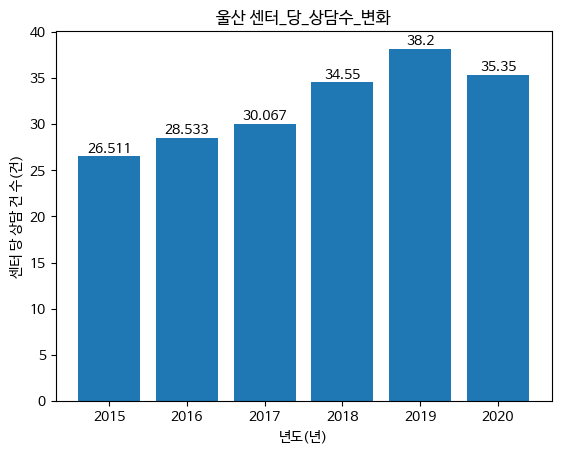

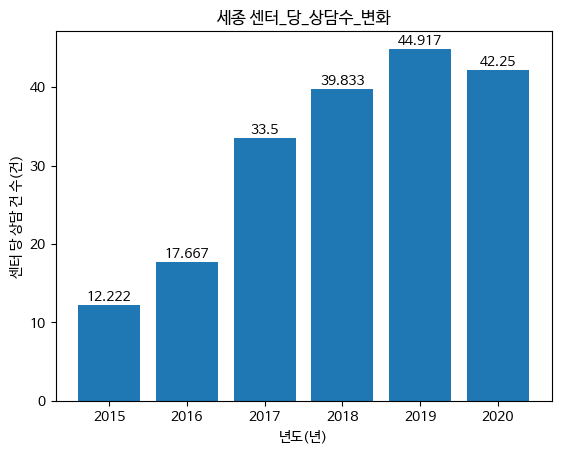

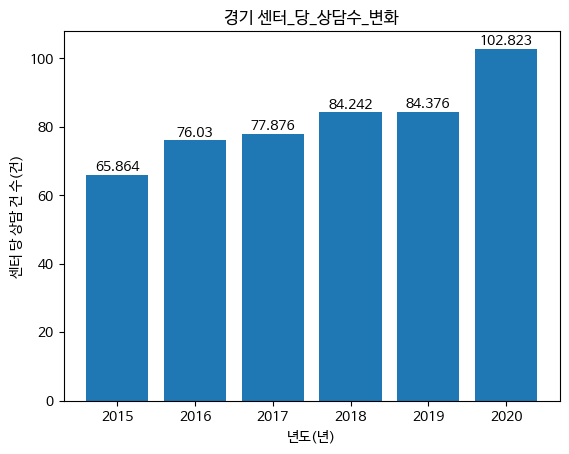

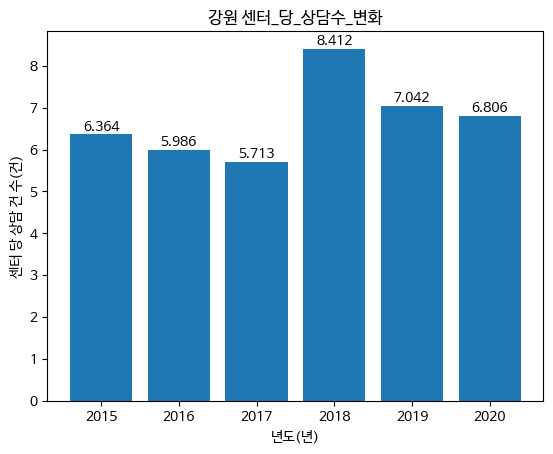

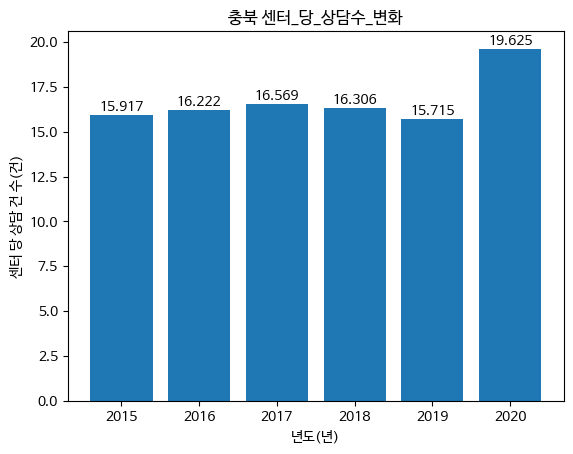

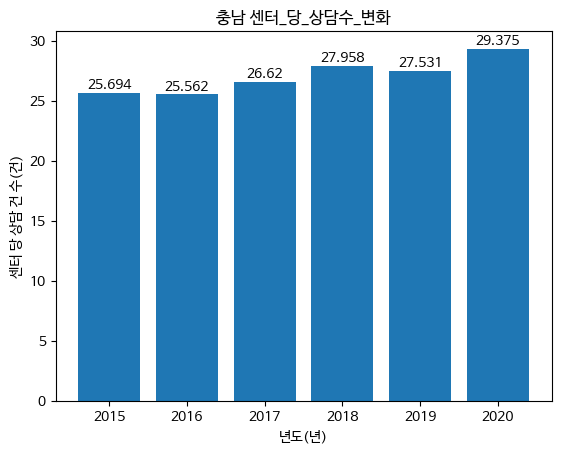

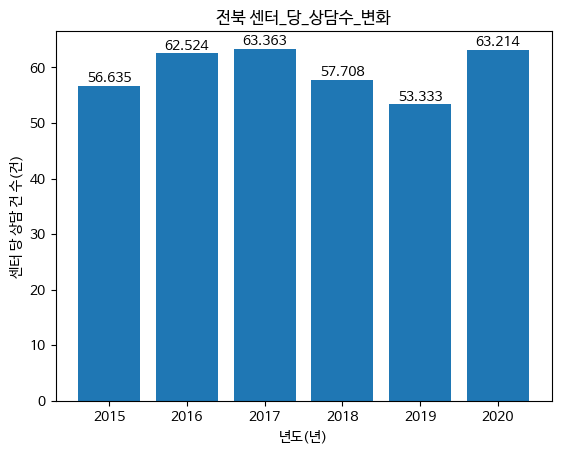

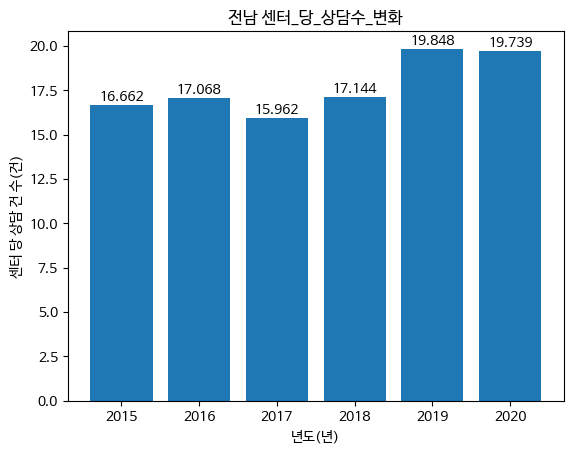

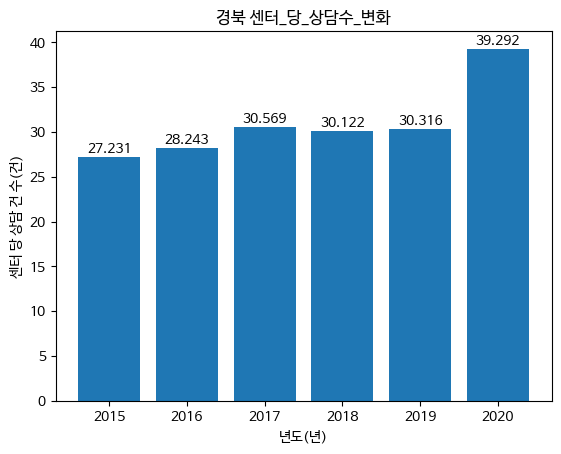

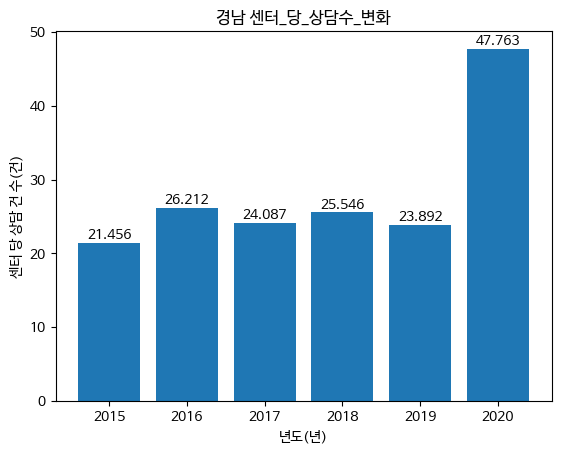

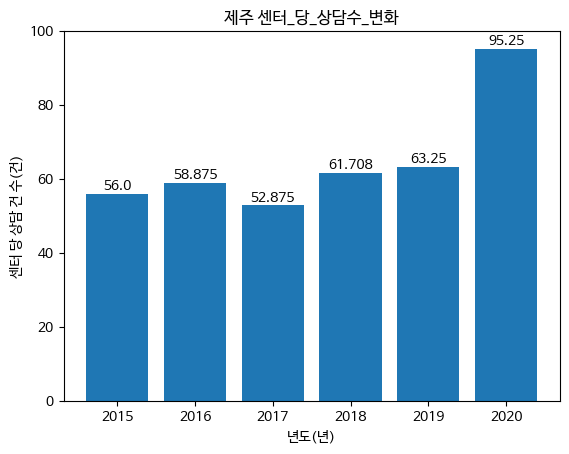

In [ ]:
for local_name in local_names:
  year_plot(local_name, center_counsel_ratio_df, "센터_당_상담수_변화", "년도(년)", "센터 당 상담 건 수(건)")

## 상관관계 시각화

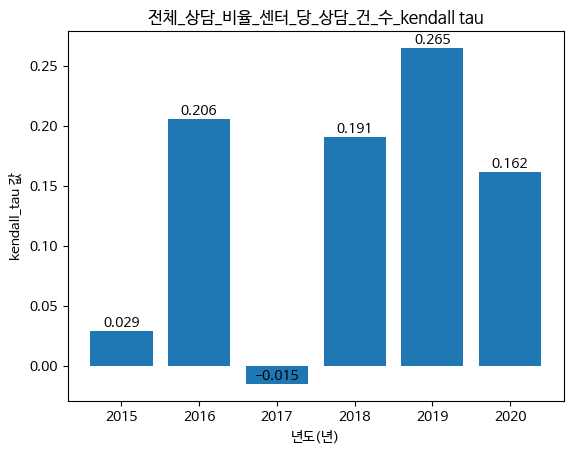

In [ ]:
year_plot(target_name=False,
          target_df=kendall_tau_list,
          title="전체_상담_비율_센터_당_상담_건_수_kendall tau",
          xl="년도(년)",
          yl="kendall_tau 값")

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


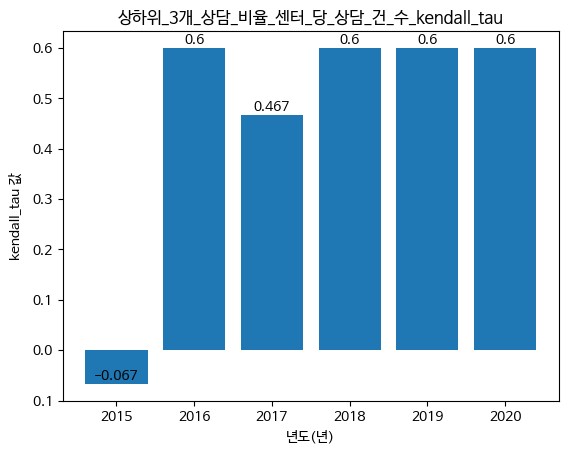

In [ ]:
year_plot(target_name=False,
          target_df=sliced_kendall_tau_list,
          title="상하위_3개_상담_비율_센터_당_상담_건_수_kendall_tau",
          xl="년도(년)",
          yl="kendall_tau 값")

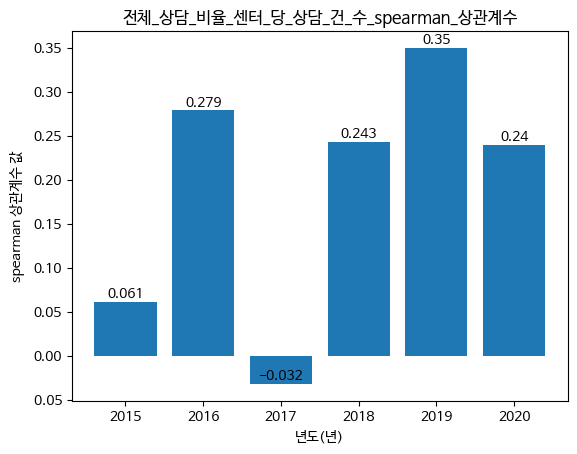

In [ ]:
year_plot(target_name=False,
          target_df=spearman_corr_list,
          title="전체_상담_비율_센터_당_상담_건_수_spearman_상관계수",
          xl="년도(년)",
          yl="spearman 상관계수 값")

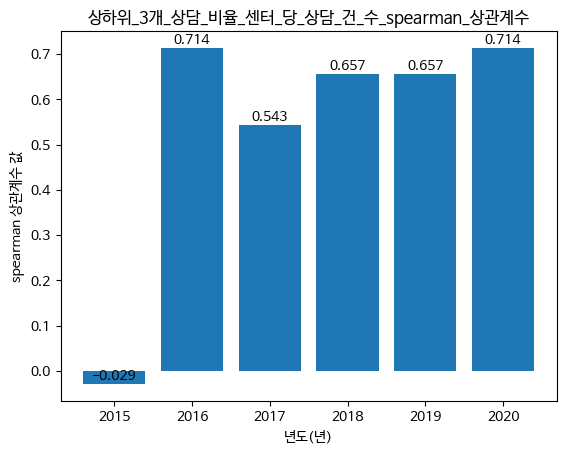

In [ ]:
year_plot(target_name=False,
          target_df=sliced_spearman_corr_list,
          title="상하위_3개_상담_비율_센터_당_상담_건_수_spearman_상관계수",
          xl="년도(년)",
          yl="spearman 상관계수 값")